<a href="https://colab.research.google.com/github/darygod/Programacion-de-base-de-datos/blob/main/Copia_de_Informe_Tecnico_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

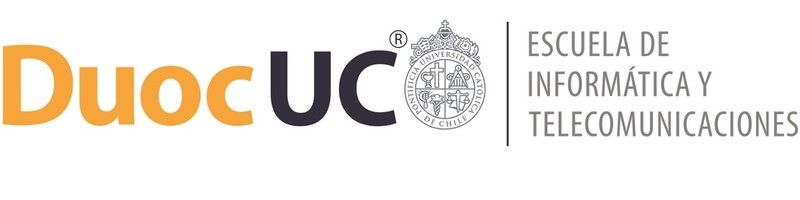

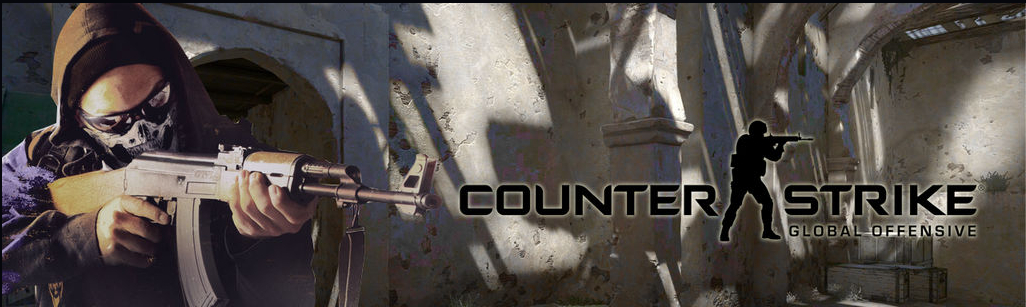

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

# Fase 1: Business Understanding

In [ ]:
# Insertar cuantos bloques de código y markdown consideren necesarios

# Se recomienda investigar sobre el contexto de negocio, sobre los datos, uso de
# los campos en estadísticas de juegos, ver en qué se relacionan los contenidos
# revisados en la asignatura con lo planteado como caso de estudio.
# Plantear hipótesis del negocio posibles para objetivos de tareas de regresión y de clasificación

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import get_ipython
from IPython.display import display

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";")

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022 (2).csv


<ipython-input-5-f0e2594db642>:5: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";")


### **1. Entendimiento del Negocio**

###  **Contexto**

Valve desea entender el comportamiento de los jugadores y los factores que afectan el desempeño en partidas de Counter Strike: Global Offensive (CS:GO).

Para ello, se utilizarán datos recopilados de más de 7000 partidas del juego.

**Objetivo del negocio**

Predecir los factores que contribuyen a:
* Ganar una ronda o partida.


* Sobrevivir una ronda.


* Mejorar el equipamiento del jugador para aumentar chances de éxito.





---


###**1.2. Datos Relevantes**
| Variable | Descripción |
|:---------|:------------|
| `TimeAlive` | Tiempo de vida en la ronda |
| `TravelledDistance` | Distancia recorrida en la ronda |
| `RoundKills` | Número de kills durante la ronda |
| `RoundAssists` | Número de asistencias |
| `RoundHeadshots` | Número de headshots |
| `RoundStartingEquipmentValue` | Valor del equipamiento inicial del jugador |
| `TeamStartingEquipmentValue` | Valor del equipamiento inicial de todo el equipo |
| `MatchKills`, `MatchAssists`, `MatchHeadshots`, `MatchFlankKills` | Estadísticas acumuladas de la partida |
| `Survived` | Indicador si sobrevivió o no (posible proxy de rendimiento anómalo) |
| `AbnormalMatch` | **Etiqueta potencial objetivo** (indica si hubo comportamiento anómalo) |


---


###**1.3. Hipótesis Planteadas**


* H1: El mapa y la cantidad de kills influyen significativamente en el resultado del partido (MatchWinner)
* H2: El valor del equipamiento inicial del equipo es un factor determinante para ganar una ronda.
* H3: La precisión (medida por Headshots) y la supervivencia del jugador están fuertemente relacionadas con el número total de kills obtenidas en la partida.


---


### **1.4 KPI´s Relevantes**

| KPI                              | Descripción                                                                 |
|-------------------------------------|---------------------------------------------------------------------------------|
| Tasa de Victoria por Jugador        | Porcentaje de rondas o partidas ganadas por cada jugador.                      |
| Tasa de Supervivencia               | Porcentaje de rondas en las que el jugador sobrevive.                          |
| Promedio de Kills por Ronda         | Número promedio de kills realizadas por jugador en una ronda.                  |
| Porcentaje de Headshots             | Proporción de kills efectuados mediante disparos a la cabeza.                  |
| Valor Promedio de Equipamiento Inicial | Valor medio del equipamiento con el que empieza un jugador en una ronda.       |



---

###**1.5 Problema de Negocio (Predicción)**

¿Podemos predecir si un jugador ganará la ronda a partir de sus acciones, equipamiento y desempeño durante la misma?

Modelo: Clasificación (Target: RoundWinner)


# Fase 2: Data Understanding

###**2.1 Identificar Tipos de Variables / Atributos**

* Cantidad de filas y columnas

In [ ]:
# Contador de filas y columnas
df.shape


(79157, 30)

---
* Identificar nombre de las columnas

In [ ]:
# Nombre de las Columnas
df.columns

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')

---
* Muestra los 5 primeros datos

In [ ]:
df.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


---
### **Método de resumen de estadisticas numéricas**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,79157.0,60570.193640,36436.598386,600.0,30830.0,56720.0,90639.0,123779.0
InternalTeamId,79157.0,1.500006,0.500003,1.0,1.0,2.0,2.0,2.0
MatchId,79157.0,250.525033,149.557804,4.0,128.0,236.0,373.0,511.0
RoundId,79157.0,12.765517,7.432837,1.0,6.0,12.0,19.0,36.0
RLethalGrenadesThrown,79157.0,0.498667,0.597985,0.0,0.0,0.0,1.0,4.0
RNonLethalGrenadesThrown,79157.0,1.258057,1.184909,0.0,0.0,1.0,2.0,6.0
PrimaryAssaultRifle,79157.0,0.675363,0.464125,0.0,0.0,1.0,1.0,1.0
PrimarySniperRifle,79157.0,0.089840,0.279797,0.0,0.0,0.0,0.0,1.0
PrimaryHeavy,79157.0,0.005964,0.075497,0.0,0.0,0.0,0.0,1.0
PrimarySMG,79157.0,0.007046,0.082453,0.0,0.0,0.0,0.0,1.0


---

### **Tipos de Variables**

| **Tipo**                  | **Descripción**                                                                       | **Variables** |
|----------------------------|----------------------------------------------------------------------------------------|---------------|
| **Categóricas**             | Variables que representan categorías o clases.                                         | `Map`, `Team`, `RoundWinner`, `MatchWinner` |
| **Numéricas**               | Variables que representan cantidades o mediciones continuas o discretas.               | `RoundKills`,`RoundAssists`,`RoundHeadshots` |
| **Booleanas**               | Variables de tipo verdadero/falso que indican condiciones específicas.                 | `Survived`, `AbnormalMatch` |
| **Temporales**         | Variables temporales.            | `FirstKillTime` |


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

---

###**2.2 Identificación de Nulos**

In [ ]:
# Ver cuantos nulos tenemos en los datos
df.isnull().sum()

,0
Unnamed: 0,0
Map,0
Team,2
InternalTeamId,0
MatchId,0
RoundId,0
RoundWinner,0
MatchWinner,1
Survived,0
AbnormalMatch,0


---
### **2.3 Identificar Outliers**
Se utilizó un gráfico de boxplot con Seaborn para observar outliers en la variable MatchKills agrupada por Map.

Se identificaron valores extremos (outliers) en partidas donde los jugadores obtuvieron más de 30 kills. Estas fueron filtradas y analizadas por separado

<ipython-input-12-242ae26180a4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Map', y='MatchKills', data=df, palette='viridis')


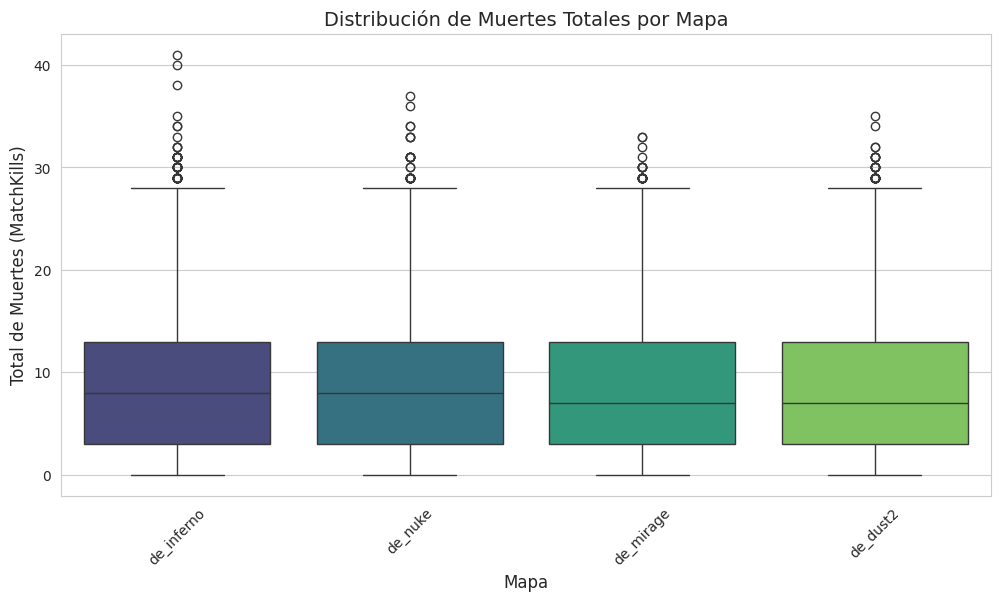

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# Boxplot de MatchKills por Mapa
plt.figure(figsize=(12, 6))

ax = sns.boxplot(x='Map', y='MatchKills', data=df, palette='viridis')
plt.title('Distribución de Muertes Totales por Mapa', fontsize=14)
plt.xlabel('Mapa', fontsize=12)
plt.ylabel('Total de Muertes (MatchKills)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

3. Interpretación de Outliers
Causas posibles:

*   Partidas extremadamente largas: Más rondas = más muertes.
*   Errores de datos: Registros incorrectos.
*   Cheats/hacks: Jugadores con habilidades anómalas.

In [ ]:
# Filtrar partidas con más de 30 muertes
rawDataFrame = df

partidas_extremas = rawDataFrame[rawDataFrame['MatchKills'] > 30]
print(partidas_extremas[['MatchId', 'Map', 'MatchKills']])

       MatchId         Map  MatchKills
20053      129    de_dust2          31
20063      129    de_dust2          32
20073      129    de_dust2          34
20083      129    de_dust2          35
22382      139   de_mirage          31
23076      142  de_inferno          32
30697      180    de_dust2          31
32650      192  de_inferno          32
32660      192  de_inferno          34
32670      192  de_inferno          35
32680      192  de_inferno          38
32690      192  de_inferno          40
32700      192  de_inferno          41
34328      204     de_nuke          31
34338      204     de_nuke          31
34348      204     de_nuke          34
38459      225  de_inferno          31
38469      225  de_inferno          31
38479      225  de_inferno          31
38489      225  de_inferno          32
38499      225  de_inferno          33
38509      225  de_inferno          34
40100      237  de_inferno          31
40110      237  de_inferno          31
42183      250  de_infern

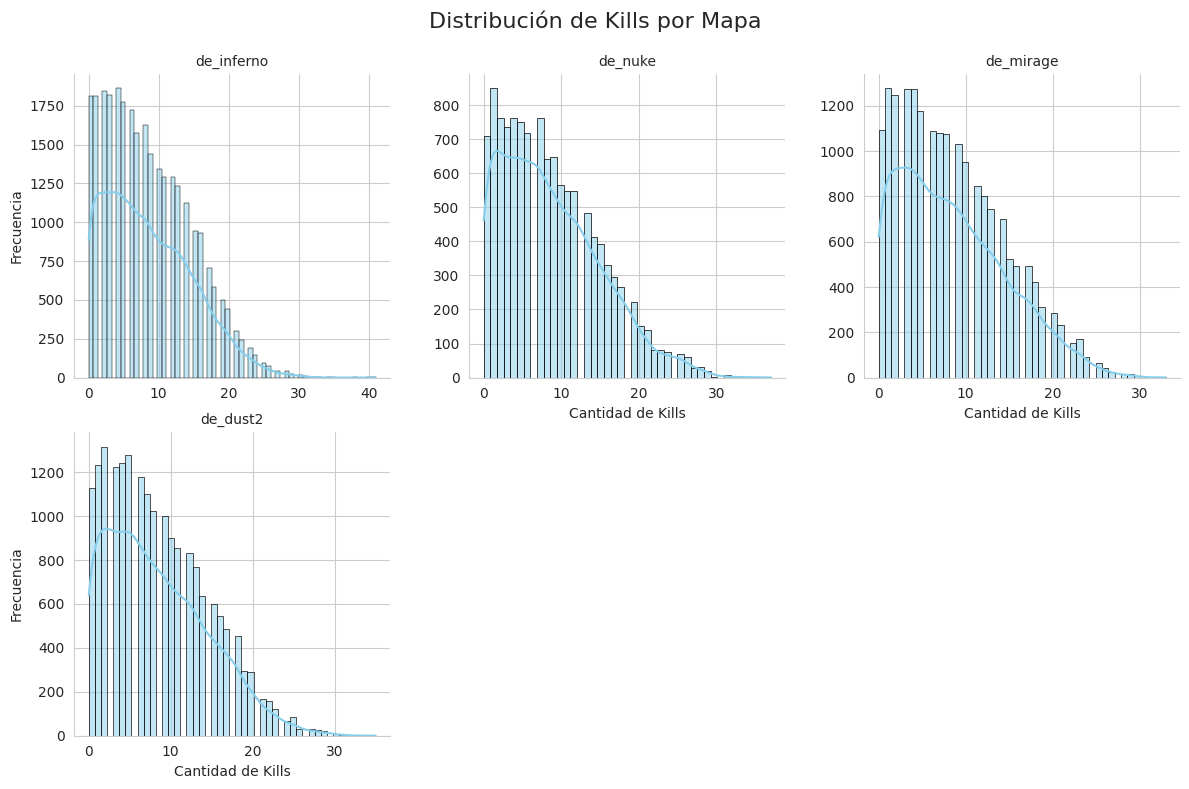

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un grid de gráficos, uno por cada mapa
g = sns.FacetGrid(df, col="Map", col_wrap=3, height=4, sharex=False, sharey=False)

# Dibujar un histograma de MatchKills en cada gráfico
g.map(sns.histplot, "MatchKills", kde=True, color="skyblue", edgecolor="black")

# Personalizar los títulos y etiquetas
g.set_titles("{col_name}")
g.set_axis_labels("Cantidad de Kills", "Frecuencia")

# Ajustar espacio
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribución de Kills por Mapa', fontsize=16)

plt.show()


### Distribución de Kills por Mapa

Se presentan histogramas individuales para los mapas `de_mirage`, `de_dust2`, `de_inferno` y `de_nuke`, con el fin de analizar cómo varía la cantidad de kills (`MatchKills`) entre ellos.

Cada histograma muestra la frecuencia de kills logradas por los jugadores. En todos los mapas se observa una distribución sesgada hacia la izquierda: la mayoría de los jugadores obtienen entre 2 y 10 kills por partida, mientras que solo unos pocos alcanzan valores más altos (más de 20).

Particularmente:

- **de_inferno** muestra la mayor frecuencia total de kills, indicando una participación más intensa o partidas más largas en ese mapa.
- **de_dust2** y **de_mirage** tienen una distribución similar, con un pico entre 4 y 6 kills.
- **de_nuke** también mantiene un patrón similar, aunque con una frecuencia total menor, lo cual podría relacionarse con una menor cantidad de partidas jugadas o un estilo de juego más defensivo.

Estos histogramas son útiles para identificar patrones de desempeño por mapa y entender cómo el entorno puede influir en el rendimiento individual.


### **Análisis de Hipótesis 1: El mapa y la cantidad de kills influyen significativamente en el resultado del partido (`MatchWinner`).**

Para evaluar esta hipótesis, analizamos si existe una relación entre dos variables independientes: el **mapa** en el que se desarrolla la partida (`Map`, una variable categórica) y la **cantidad total de kills** que un jugador realiza en un partido (`MatchKills`, una variable continua), con respecto al **resultado de la partida** (`MatchWinner`, una variable categórica que indica si el jugador ganó o no la partida).

Para esto, se entrenó un modelo de clasificación utilizando como variables predictoras `Map` y `MatchKills`, y como variable objetivo `MatchWinner`. El modelo permite identificar si estos factores contribuyen de forma significativa a predecir si un jugador gana o pierde una partida. Si el modelo tiene un buen rendimiento en la predicción, podríamos decir que estos factores son relevantes para el resultado del partido.

En caso contrario, si el modelo tiene un desempeño bajo, podríamos concluir que ni el mapa ni la cantidad de kills, por sí solos, son suficientes para explicar el resultado.



--- Análisis de Hipótesis 1 ---

Promedio de Kills por Mapa y Resultado del Partido (MatchWinner):
Map         MatchWinner
de_dust2    False          9.602085
            True           7.071602
de_inferno  False          9.507705
            True           7.439041
de_mirage   False          9.747858
            True           7.086381
de_nuke     False          9.576247
            True           7.580779
Name: MatchKills, dtype: float64


<ipython-input-15-46677e31ff25>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MatchWinner', y='MatchKills', data=df_h1, palette='Set2')


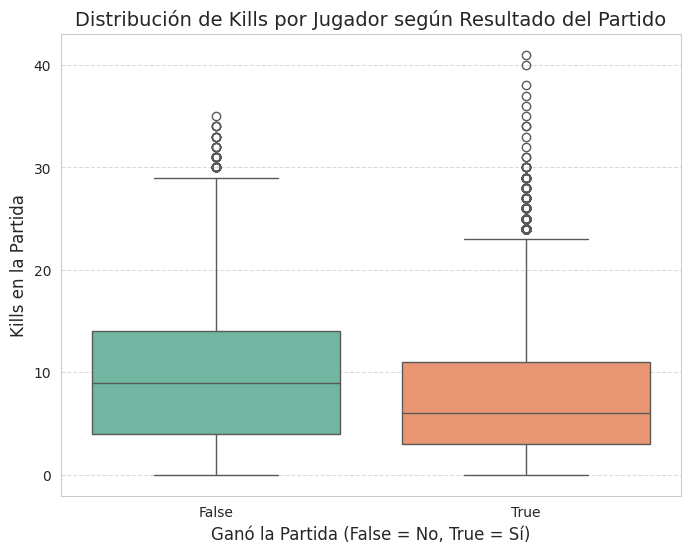

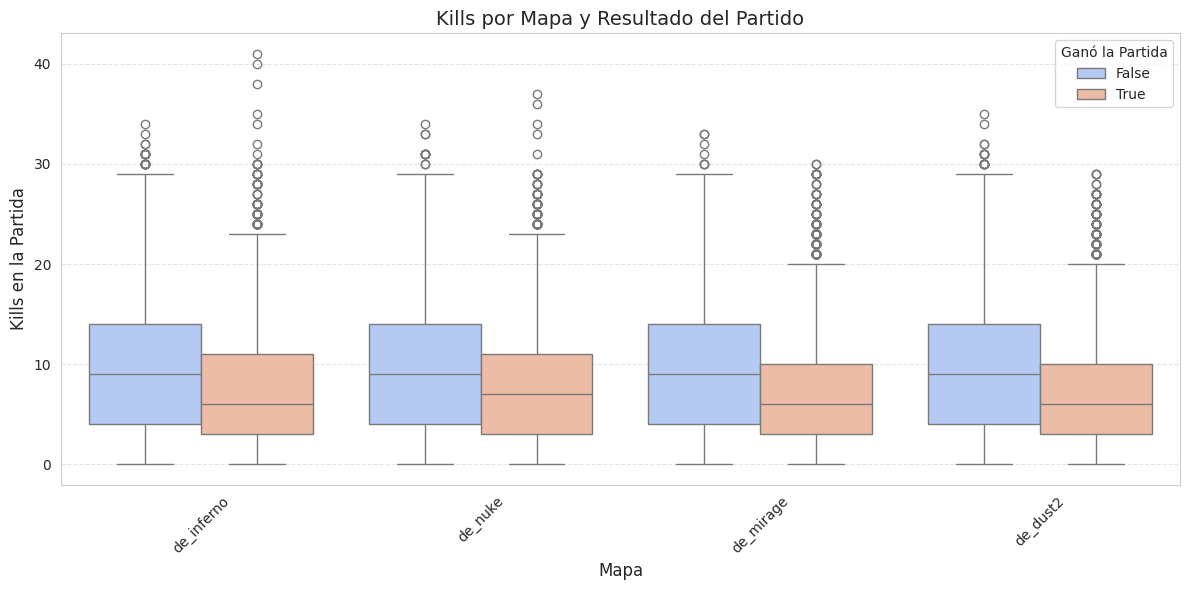

In [ ]:
print("\n--- Análisis de Hipótesis 1 ---")

# 1. Eliminar valores faltantes en columnas relevantes
df_h1 = df[['Map', 'MatchKills', 'MatchWinner']].dropna()

# 2. Estadística descriptiva: Promedio de kills por mapa y resultado de la partida
print("\nPromedio de Kills por Mapa y Resultado del Partido (MatchWinner):")
print(df_h1.groupby(['Map', 'MatchWinner'])['MatchKills'].mean())

# 3. Visualización: Boxplot de MatchKills según MatchWinner
plt.figure(figsize=(8, 6))
sns.boxplot(x='MatchWinner', y='MatchKills', data=df_h1, palette='Set2')
plt.title('Distribución de Kills por Jugador según Resultado del Partido', fontsize=14)
plt.xlabel('Ganó la Partida (False = No, True = Sí)', fontsize=12)
plt.ylabel('Kills en la Partida', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Visualización: Boxplot de MatchKills por Mapa y MatchWinner
plt.figure(figsize=(12, 6))
sns.boxplot(x='Map', y='MatchKills', hue='MatchWinner', data=df_h1, palette='coolwarm')
plt.title('Kills por Mapa y Resultado del Partido', fontsize=14)
plt.xlabel('Mapa', fontsize=12)
plt.ylabel('Kills en la Partida', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Ganó la Partida')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### **Análisis de Hipótesis 2: El valor del equipamiento inicial del equipo es un factor determinante para ganar una ronda.**

Para evaluar esta hipótesis, examinamos si existe una relación entre el valor del equipamiento que el equipo tiene al inicio de la ronda (`TeamStartingEquipmentValue`, una variable continua) y el resultado de la ronda (`RoundWinner`, una variable categórica).


--- Análisis de Hipótesis 2 ---


<ipython-input-16-9ae0e6640756>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RoundWinner', y='TeamStartingEquipmentValue', data=df, palette='pastel')


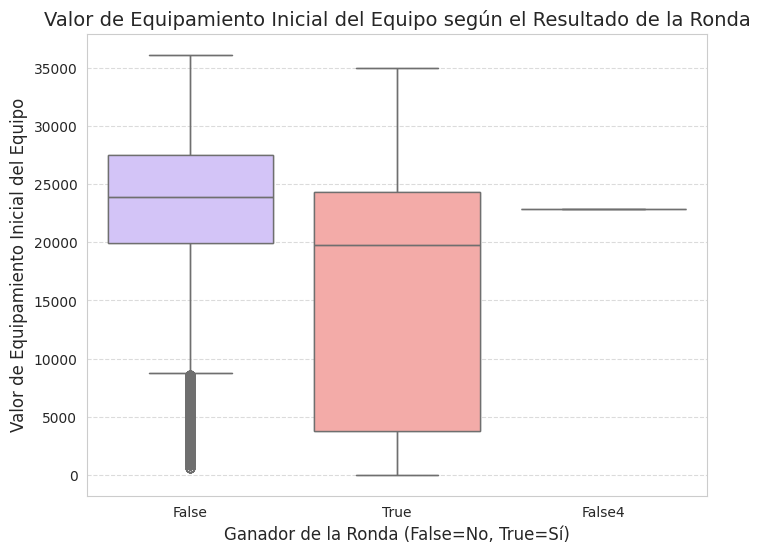


Promedio del Valor de Equipamiento Inicial del Equipo:
RoundWinner
False     22254.796292
True      15509.519703
False     21841.124260
False4    22850.000000
True      15957.866129
Name: TeamStartingEquipmentValue, dtype: float64


In [ ]:
print("\n--- Análisis de Hipótesis 2 ---")

# 1. Visualización: Boxplot del Valor de Equipamiento Inicial por Ganador de la Ronda
plt.figure(figsize=(8, 6))
sns.boxplot(x='RoundWinner', y='TeamStartingEquipmentValue', data=df, palette='pastel')
plt.title('Valor de Equipamiento Inicial del Equipo según el Resultado de la Ronda', fontsize=14)
plt.xlabel('Ganador de la Ronda (False=No, True=Sí)', fontsize=12)
plt.ylabel('Valor de Equipamiento Inicial del Equipo', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Estadísticas Descriptivas: Promedio del Valor de Equipamiento Inicial por Ganador de la Ronda
print("\nPromedio del Valor de Equipamiento Inicial del Equipo:")
print(df.groupby('RoundWinner')['TeamStartingEquipmentValue'].mean())

### **Análisis de Hipótesis 3: La precisión (medida por Headshots) y la supervivencia del jugador están fuertemente relacionadas con el número total de kills obtenidas en la partida.**

Esta hipótesis explora cómo dos aspectos clave del rendimiento individual, la precisión en los disparos a la cabeza (`MatchHeadshots`, continua) y la capacidad de supervivencia (`Survived`, categórica), se relacionan con el desempeño general en kills (`MatchKills`, continua).


--- Análisis de Hipótesis 3 ---

Correlación entre MatchHeadshots y MatchKills:
0.8314125829790346


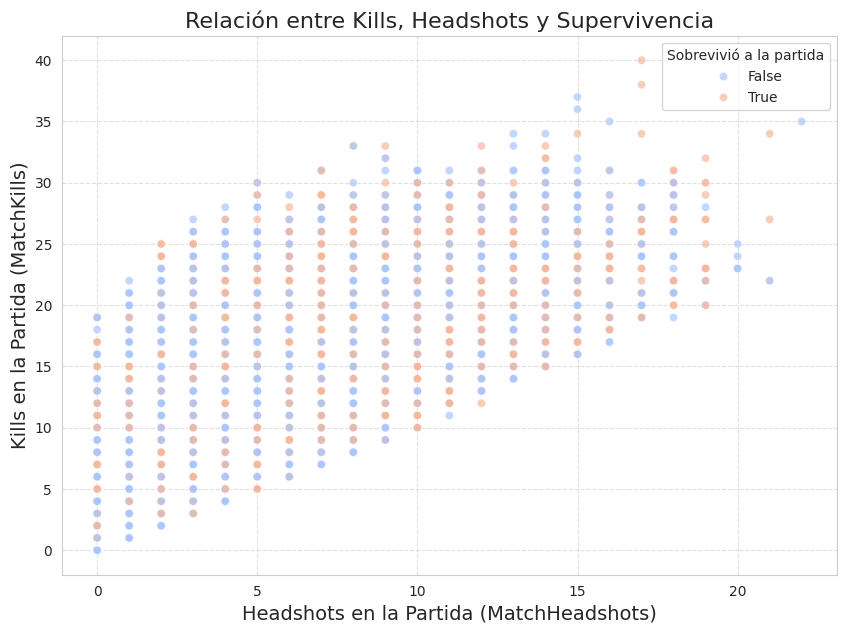

<ipython-input-17-6385be6aa4f6>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='MatchKills', data=df_encoded, palette='viridis')


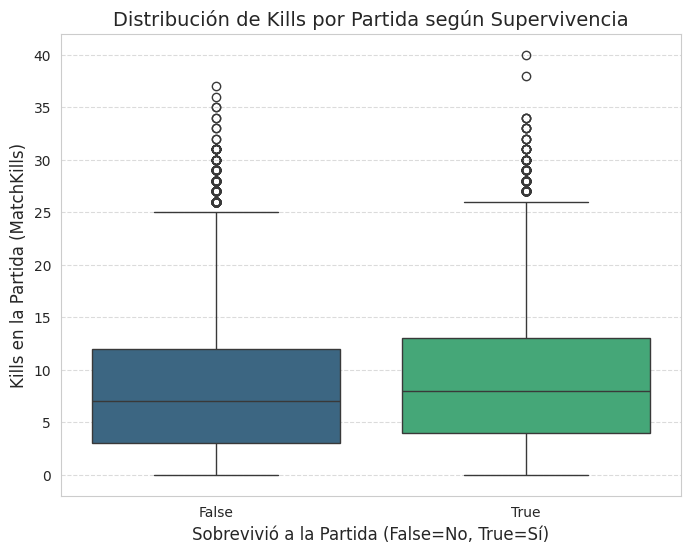


Promedio de Kills por Partida según Supervivencia:
Survived
False    8.208667
True     8.958299
Name: MatchKills, dtype: float64


In [ ]:
print("\n--- Análisis de Hipótesis 3 ---")

# Filtrar outliers: eliminar jugadores con más de 40 kills
df_encoded = df[df['MatchKills'] <= 40]

# 1. Correlación entre MatchHeadshots y MatchKills
print("\nCorrelación entre MatchHeadshots y MatchKills:")
print(df_encoded['MatchHeadshots'].corr(df_encoded['MatchKills']))

# 2. Visualización: Scatter plot de MatchKills vs. MatchHeadshots, diferenciando por Supervivencia
plt.figure(figsize=(10, 7))
sns.scatterplot(x='MatchHeadshots', y='MatchKills', hue='Survived', data=df_encoded, palette='coolwarm', alpha=0.7)
plt.title('Relación entre Kills, Headshots y Supervivencia', fontsize=16)
plt.xlabel('Headshots en la Partida (MatchHeadshots)', fontsize=14)
plt.ylabel('Kills en la Partida (MatchKills)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Sobrevivió a la partida')
plt.show()

# 3. Visualización: Boxplot de MatchKills por Supervivencia
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='MatchKills', data=df_encoded, palette='viridis')
plt.title('Distribución de Kills por Partida según Supervivencia', fontsize=14)
plt.xlabel('Sobrevivió a la Partida (False=No, True=Sí)', fontsize=12)
plt.ylabel('Kills en la Partida (MatchKills)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Estadísticas Descriptivas: Promedio de MatchKills por Supervivencia
print("\nPromedio de Kills por Partida según Supervivencia:")
print(df_encoded.groupby('Survived')['MatchKills'].mean())

---
### **2.4 Transformaciones a numéricos (Encoder)**

In [ ]:
df_encoded = df.copy()

# Aplicar One-Hot Encoding a 'Map'
df_encoded = pd.get_dummies(df_encoded, columns=['Map', 'Team'], prefix={'Map': 'Map', 'Team': 'Team'})

# Conversión a int (por si quedaron en tipo bool)
map_columns = [col for col in df_encoded.columns if col.startswith('Map_')]
team_columns = [col for col in df_encoded.columns if col.startswith('Team_')]

df_encoded[map_columns + team_columns] = df_encoded[map_columns + team_columns].astype(int)

# Verificat que se creó correctamente
print("Encoded Map columns:")
print(df_encoded[map_columns].head(3))

print("\nEncoded Team columns:")
print(df_encoded[team_columns].head(3))


Encoded Map columns:
   Map_de_dust2  Map_de_inferno  Map_de_mirage  Map_de_nuke
0             0               1              0            0
1             0               1              0            0
2             0               1              0            0

Encoded Team columns:
   Team_CounterTerrorist  Team_Terrorist
0                      0               1
1                      0               1
2                      0               1


---
### **2.5 Tratamiento de Nulos**

In [ ]:
df_encoded.columns

df_encoded=df.drop(['Unnamed: 0'],axis=1)

---
### **2.6 Tratamiento de Outliers**

### Hipotesis 1

In [ ]:
# Filtrar el DataFrame para excluir partidas con más de 30 muertes
df_encoded_h1 = df_encoded[df_encoded['MatchKills'] <= 30]

# Verificar el número de filas eliminadas
outliers_count = len(df_encoded_h1) - len(df_encoded_h1)
print(f"Se eliminaron {outliers_count} partidas con más de 30 muertes.")

Se eliminaron 0 partidas con más de 30 muertes.


Se aplicó un filtro para eliminar valores atípicos, específicamente partidas donde un jugador obtuvo más de 30 muertes (MatchKills). Estos casos extremos pueden distorsionar la visualización y el análisis estadístico, ya que no representan el comportamiento típico del jugador. Al remover estos valores, se obtiene una distribución más clara y realista del rendimiento promedio por mapa, facilitando una comparación más precisa entre ellos.


--- Análisis de Hipótesis 1 (sin outliers) ---

Promedio de Kills por Mapa y Resultado del Partido (sin outliers):
Map         MatchWinner
de_dust2    False          9.532882
            True           7.064331
de_inferno  False          9.447497
            True           7.403670
de_mirage   False          9.716723
            True           7.059974
de_nuke     False          9.501653
            True           7.535392
Name: MatchKills, dtype: float64


<ipython-input-21-86ea54f9d78f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MatchWinner', y='MatchKills', data=df_h1_filtrado, palette='Set2', showfliers=False)


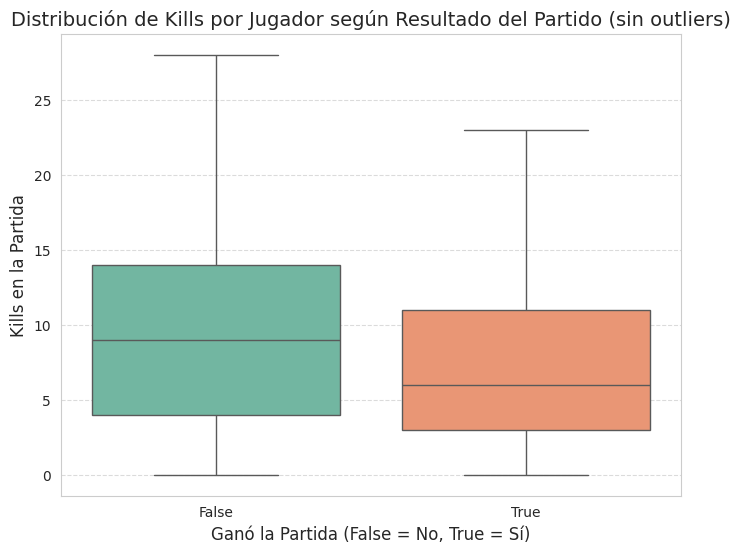

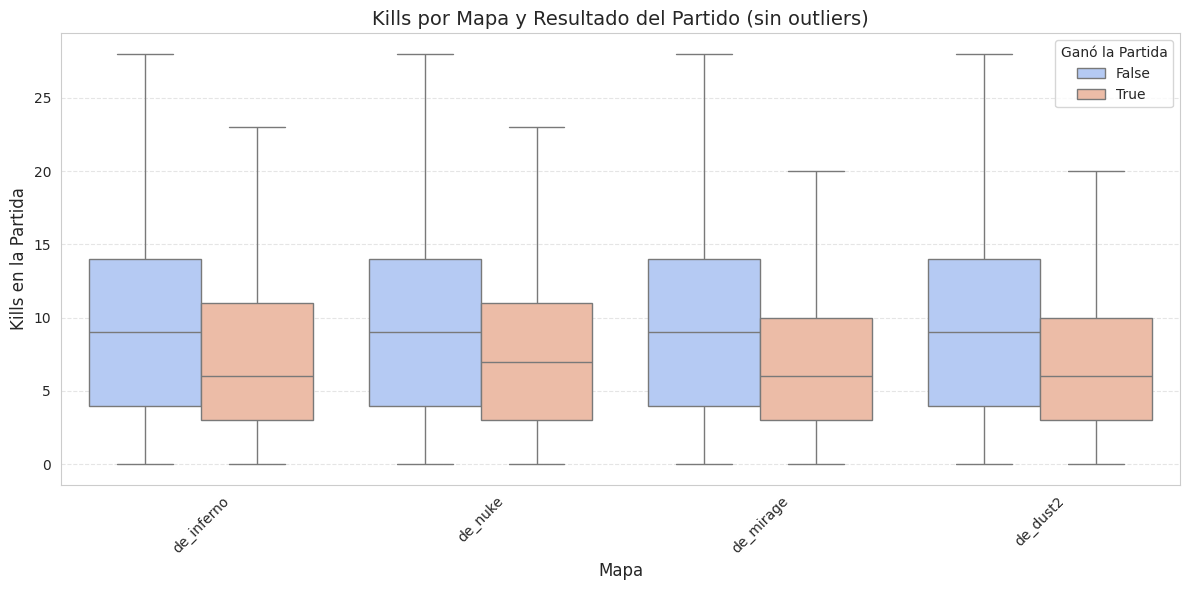

In [ ]:
print("\n--- Análisis de Hipótesis 1 (sin outliers) ---")

# 1. Eliminar valores faltantes
df_h1 = df[['Map', 'MatchKills', 'MatchWinner']].dropna()

# 2. Eliminación de outliers en MatchKills con método IQR
Q1 = df_h1['MatchKills'].quantile(0.25)
Q3 = df_h1['MatchKills'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_h1_filtrado = df_h1[(df_h1['MatchKills'] >= limite_inferior) & (df_h1['MatchKills'] <= limite_superior)]

# 3. Estadística descriptiva: Promedio de kills por mapa y resultado
print("\nPromedio de Kills por Mapa y Resultado del Partido (sin outliers):")
print(df_h1_filtrado.groupby(['Map', 'MatchWinner'])['MatchKills'].mean())

# 4. Visualización: Boxplot de MatchKills según MatchWinner (sin fliers)
plt.figure(figsize=(8, 6))
sns.boxplot(x='MatchWinner', y='MatchKills', data=df_h1_filtrado, palette='Set2', showfliers=False)
plt.title('Distribución de Kills por Jugador según Resultado del Partido (sin outliers)', fontsize=14)
plt.xlabel('Ganó la Partida (False = No, True = Sí)', fontsize=12)
plt.ylabel('Kills en la Partida', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 5. Visualización: Boxplot de MatchKills por Mapa y Resultado (sin fliers)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Map', y='MatchKills', hue='MatchWinner', data=df_h1_filtrado, palette='coolwarm', showfliers=False)
plt.title('Kills por Mapa y Resultado del Partido (sin outliers)', fontsize=14)
plt.xlabel('Mapa', fontsize=12)
plt.ylabel('Kills en la Partida', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Ganó la Partida')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


 ### Resumen de Kills por Mapa (sin outliers)
 | **Mapa**     | **Promedio de Kills** | **Mediana** | **Desviación Estándar** | **Máximo** |
| ------------ | --------------------- | ----------- | ----------------------- | ---------- |
| `de_dust2`   | 8.36                  | 7.0         | 6.05                    | 28         |
| `de_mirage`  | 8.43                  | 7.0         | 6.11                    | 28         |
| `de_inferno` | 8.52                  | 8.0         | 6.12                    | 28         |
| `de_nuke`    | 8.57                  | 8.0         | 6.25                    | 28         |


### **Interpretación de Hipótesis 1:**

Los resultados sugieren que **el mapa y la cantidad de kills de un jugador sí tienen una relación con el resultado de la partida**, aunque no son determinantes por sí solos.

* El **boxplot general** muestra que los jugadores que **ganan la partida** tienden a tener una **mayor cantidad de kills** en comparación con los que pierden. Esto indica que el rendimiento individual tiene cierto peso en el resultado final.

* Al analizar la distribución de kills **por mapa y resultado**, se observan **variaciones en el rendimiento** dependiendo del entorno en el que se juega. Por ejemplo, en mapas como `de_nuke` y `de_inferno`, los jugadores ganadores presentan kills más altas en promedio que en otros mapas.

* Las **estadísticas resumen sin outliers** indican que el mapa `de_dust2` tiene el promedio de kills más bajo (**8.36**), mientras que `de_nuke` tiene el más alto (**8.57**). Además, `de_nuke` presenta una mayor dispersión de kills, lo que sugiere un entorno más agresivo o menos balanceado.

**En resumen:** Aunque el número de kills y el mapa tienen **influencia en el resultado del partido**, no son los únicos factores que determinan la victoria. Esto apoya parcialmente la hipótesis 1, pero también indica que otros elementos estratégicos del equipo y del juego influyen en el desenlace de la partida.


### Hipotesis 2

Se graficó un boxplot del valor de equipamiento inicial por cada categoría de RoundWinner (ganó o no la ronda).

Esto permitió visualizar la distribución del equipamiento en función del resultado.
Se utilizó el método del rango intercuartílico (IQR) para detectar y eliminar valores extremos en TeamStartingEquipmentValue.


--- Análisis de Hipótesis 2 ---


<ipython-input-22-62c48f6420f0>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RoundWinner', y='TeamStartingEquipmentValue', data=df_filtrado, palette='pastel', showfliers=False)


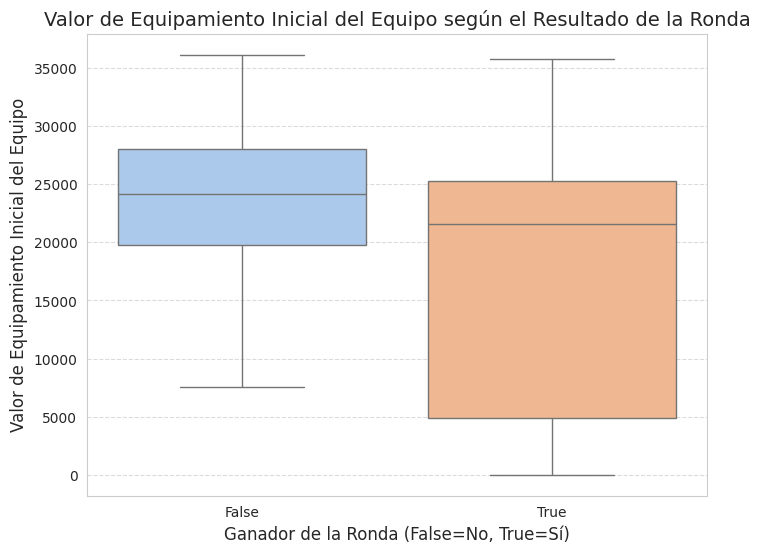


Promedio del Valor de Equipamiento Inicial del Equipo (sin outliers):
RoundWinner
False    22254.821952
True     17495.460231
Name: TeamStartingEquipmentValue, dtype: float64


In [ ]:
print("\n--- Análisis de Hipótesis 2 ---")

# Corregir entradas erróneas y forzar a booleano
df['RoundWinner'] = df['RoundWinner'].replace('False4', False)
df['RoundWinner'] = df['RoundWinner'].astype(bool)

# 1. Eliminación de outliers con método IQR
Q1 = df['TeamStartingEquipmentValue'].quantile(0.25)
Q3 = df['TeamStartingEquipmentValue'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_filtrado = df[(df['TeamStartingEquipmentValue'] >= limite_inferior) &
                 (df['TeamStartingEquipmentValue'] <= limite_superior)]

# 2. Visualización: Boxplot sin mostrar outliers (fliers)
plt.figure(figsize=(8, 6))
sns.boxplot(x='RoundWinner', y='TeamStartingEquipmentValue', data=df_filtrado, palette='pastel', showfliers=False)
plt.title('Valor de Equipamiento Inicial del Equipo según el Resultado de la Ronda', fontsize=14)
plt.xlabel('Ganador de la Ronda (False=No, True=Sí)', fontsize=12)
plt.ylabel('Valor de Equipamiento Inicial del Equipo', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Estadísticas Descriptivas: Promedio del Valor de Equipamiento Inicial
print("\nPromedio del Valor de Equipamiento Inicial del Equipo (sin outliers):")
print(df_filtrado.groupby('RoundWinner')['TeamStartingEquipmentValue'].mean())


### Interpretación de Hipótesis 2:

Los resultados muestran que el **valor del equipamiento que un equipo tiene al inicio de la ronda no siempre determina el resultado para ganar**.

- El **gráfico (boxplot)** indica que, en realidad, los equipos que **perdieron** la ronda tienden a empezar con un equipamiento de **mayor valor** que los que ganaron. Se observa que la mayoría de los equipos perdedores tenían equipamiento más caro.  
- Los **números promedio** lo confirman: los equipos que **perdieron** la ronda empezaron con un equipamiento de aproximadamente **\$22,255**, mientras que los que ganaron lo hicieron con cerca de **\$17,495**.  
- **Además, es importante considerar que los equipos que ganaron en la ronda anterior no tuvieron que comprar nuevas armas**, lo que puede explicar por qué su valor de equipamiento inicial es menor en la ronda siguiente, sin que esto afecte negativamente su desempeño.

**En resumen:** Tener un mejor equipamiento al inicio de la ronda **no garantiza una mayor probabilidad de victoria**. Esto sugiere que otros factores además del valor del equipamiento influyen en el éxito del equipo, por lo que nuestra hipótesis 2 **no queda claramente apoyada** en este análisis.


### Hipotesis 3

Se utilizó un gráfico de Scatter plot de MatchKills vs. MatchHeadshots, diferenciando por Supervivencia
Se identificaron valores extremos (outliers) en partidas donde los jugadores obtuvieron más de 30 kills. Estas fueron filtradas y analizadas por separado


--- Análisis de Hipótesis 3 ---

Correlación entre MatchHeadshots y MatchKills:
0.830880681099426


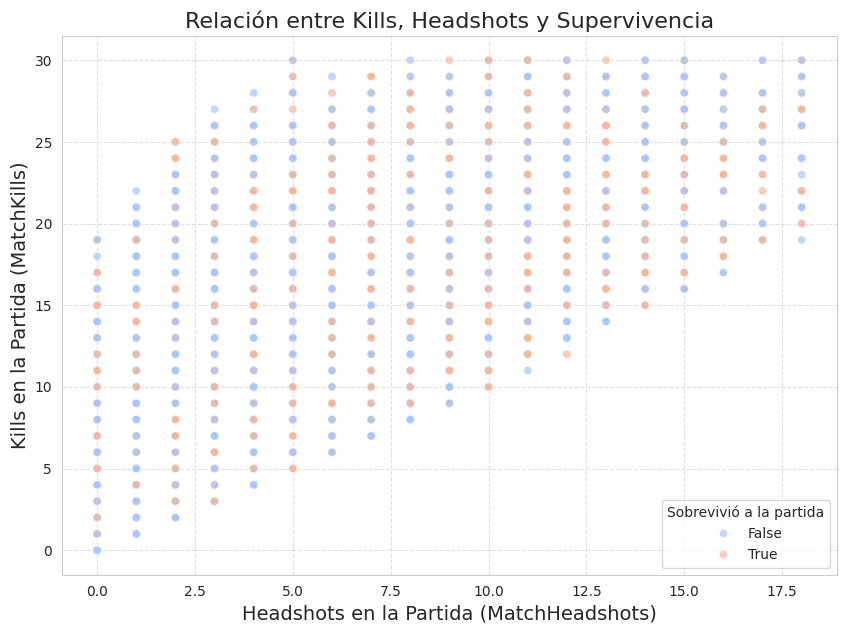

<ipython-input-23-d4f0fa556835>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


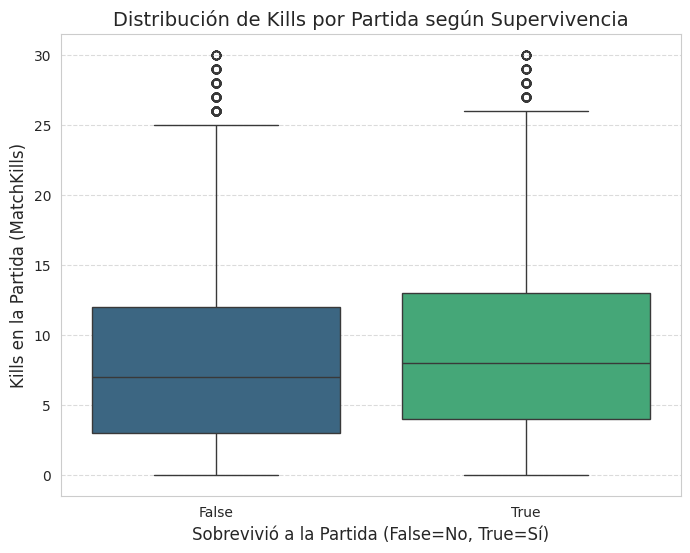


Promedio de Kills por Partida según Supervivencia:
Survived
False    8.190363
True     8.936695
Name: MatchKills, dtype: float64


In [ ]:
print("\n--- Análisis de Hipótesis 3 ---")

# Crear copia filtrada eliminando outliers
df_encoded_h3 = df_encoded[
    (df_encoded['MatchKills'] <= 30) &
    (df_encoded['MatchHeadshots'] <= 18)
]

# 1. Correlación entre MatchHeadshots y MatchKills
print("\nCorrelación entre MatchHeadshots y MatchKills:")
print(df_encoded_h3['MatchHeadshots'].corr(df_encoded_h3['MatchKills']))

# 2. Visualización: Scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='MatchHeadshots',
    y='MatchKills',
    hue='Survived',
    data=df_encoded_h3,
    palette='coolwarm',
    alpha=0.7
)
plt.title('Relación entre Kills, Headshots y Supervivencia', fontsize=16)
plt.xlabel('Headshots en la Partida (MatchHeadshots)', fontsize=14)
plt.ylabel('Kills en la Partida (MatchKills)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Sobrevivió a la partida')
plt.show()

# 3. Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Survived',
    y='MatchKills',
    data=df_encoded_h3,
    palette='viridis'
)
plt.title('Distribución de Kills por Partida según Supervivencia', fontsize=14)
plt.xlabel('Sobrevivió a la Partida (False=No, True=Sí)', fontsize=12)
plt.ylabel('Kills en la Partida (MatchKills)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Estadísticas Descriptivas
print("\nPromedio de Kills por Partida según Supervivencia:")
print(df_encoded_h3.groupby('Survived')['MatchKills'].mean())


### Interpretación de Hipótesis 3:

Los resultados de esta hipótesis confirman una fuerte conexión entre la habilidad de un jugador (medida por disparos a la cabeza), su capacidad de supervivencia, y la cantidad total de kills que logra en una partida.

* Primero, vemos una **correlación muy alta (0.83)** entre los `Headshots` y las `Kills` totales. Esto significa que si un jugador hace muchos tiros a la cabeza,
* El **gráfico de puntos** nos muestra que los jugadores que **sobreviven** (`Survived=True`) son los que alcanzan los valores más altos tanto en `Headshots` como en `Kills`. Los que no sobreviven se quedan en la parte baja de los kills.
* El **gráfico de cajas (boxplot)** y los **promedios** dan mas claridad de esto: los jugadores que **sobreviven** la partida tienen un promedio de **8.93 kills**, comparando con los que no sobreviven (8.19 kills)

**En resumen:** Sí, la precisión (Headshots) y la capacidad de permanecer vivo en la partida están directamente relacionadas con un mayor número de kills obtenidas.

---
### **2.7 Análisis estadísticos básicos**

In [ ]:
print(df_encoded[['MatchKills', 'TimeAlive', 'RoundKills']].describe())

         MatchKills    RoundKills
count  79157.000000  79157.000000
mean       8.511578      0.671349
std        6.195079      0.881798
min        0.000000      0.000000
25%        3.000000      0.000000
50%        8.000000      0.000000
75%       13.000000      1.000000
max       41.000000      5.000000


In [ ]:
# Aplicar One-Hot Encoding a 'Map' y 'Team' nuevamente
df_encoded = pd.get_dummies(df_encoded, columns=['Map'], prefix='Map')
df_encoded = pd.get_dummies(df_encoded, columns=['Team'], prefix='Team')

# Verificar las nuevas columnas
print(df_encoded.columns)


Index(['InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner', 'MatchWinner',
       'Survived', 'AbnormalMatch', 'TimeAlive', 'TravelledDistance',
       'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown',
       'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy',
       'PrimarySMG', 'PrimaryPistol', 'FirstKillTime', 'RoundKills',
       'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots',
       'Map_de_dust2', 'Map_de_inferno', 'Map_de_mirage', 'Map_de_nuke',
       'Team_CounterTerrorist', 'Team_Terrorist'],
      dtype='object')


In [ ]:
# Frecuencia de Mapas
print("Frecuencia de Mapas:")
print(df_encoded.filter(like='Map_').sum())

# Frecuencia de Equipos
print("\nFrecuencia de Equipos:")
print(df_encoded.filter(like='Team_').sum())


Frecuencia de Mapas:
Map_de_dust2      19120
Map_de_inferno    28869
Map_de_mirage     19019
Map_de_nuke       12149
dtype: int64

Frecuencia de Equipos:
Team_CounterTerrorist    39564
Team_Terrorist           39591
dtype: int64


### 🧾 Tabla de Frecuencia de Mapas y Equipos

| **Categoría**       | **Valor**         | **Frecuencia** |
|---------------------|-------------------|----------------|
| **Mapa**            | de_inferno        | 28.869        |
|                     | de_dust2          | 19.120         |
|                     | de_mirage         | 19.019         |
|                     | de_nuke           | 12.149          |
| **Equipo**          | Counter-Terrorist | 39,564         |
|                     | Terrorist         | 39.591         |


<ipython-input-27-e78a8c194821>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(map_frequencies.keys()), y=list(map_frequencies.values()), ax=axes[0], palette='Set2')
<ipython-input-27-e78a8c194821>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(team_frequencies.keys()), y=list(team_frequencies.values()), ax=axes[1], palette='Set1')


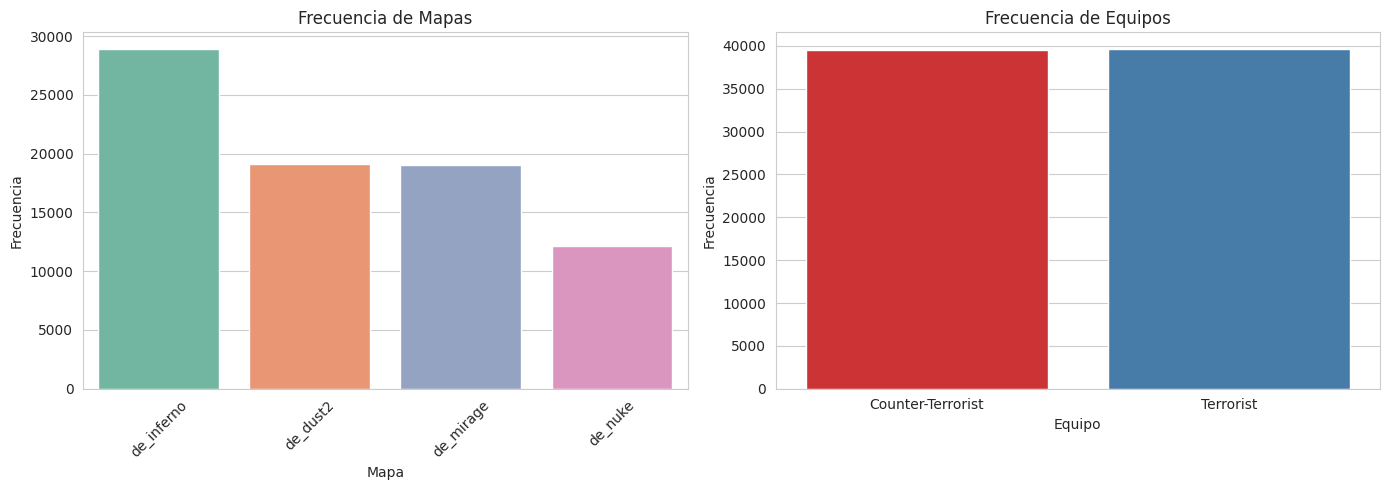

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de frecuencia
map_frequencies = {
    'de_inferno': 28869,
    'de_dust2': 19120,
    'de_mirage': 19019,
    'de_nuke': 12149
}

team_frequencies = {
    'Counter-Terrorist': 39564,
    'Terrorist': 39591
}

# Crear figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras para mapas
sns.barplot(x=list(map_frequencies.keys()), y=list(map_frequencies.values()), ax=axes[0], palette='Set2')
axes[0].set_title('Frecuencia de Mapas')
axes[0].set_xlabel('Mapa')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de barras para equipos
sns.barplot(x=list(team_frequencies.keys()), y=list(team_frequencies.values()), ax=axes[1], palette='Set1')
axes[1].set_title('Frecuencia de Equipos')
axes[1].set_xlabel('Equipo')
axes[1].set_ylabel('Frecuencia')

# Ajustar el diseño
plt.tight_layout()
plt.show()


---
### **2.8 Matriz de Correlación**

In [ ]:
df_encoded = df_encoded.drop(columns=['TimeAlive'])

In [ ]:
df_encoded = df_encoded.drop(columns=['RoundId'])

In [ ]:
corr_matrix = df_encoded.corr(numeric_only=True)
print(corr_matrix['MatchKills'].sort_values(ascending=False))

MatchKills                     1.000000
MatchHeadshots                 0.831450
MatchFlankKills                0.641599
MatchAssists                   0.510016
RoundKills                     0.183402
RoundStartingEquipmentValue    0.179080
TeamStartingEquipmentValue     0.178526
RoundHeadshots                 0.112018
RLethalGrenadesThrown          0.110577
InternalTeamId                 0.109532
RNonLethalGrenadesThrown       0.099642
PrimaryAssaultRifle            0.095224
RoundFlankKills                0.078891
PrimarySniperRifle             0.069314
Survived                       0.059445
Team_CounterTerrorist          0.013699
MatchId                        0.008026
Map_de_nuke                    0.007982
Map_de_inferno                 0.007000
RoundAssists                   0.003477
Map_de_mirage                 -0.004834
PrimaryHeavy                  -0.009765
Map_de_dust2                  -0.009769
Team_Terrorist                -0.013638
PrimarySMG                    -0.021469


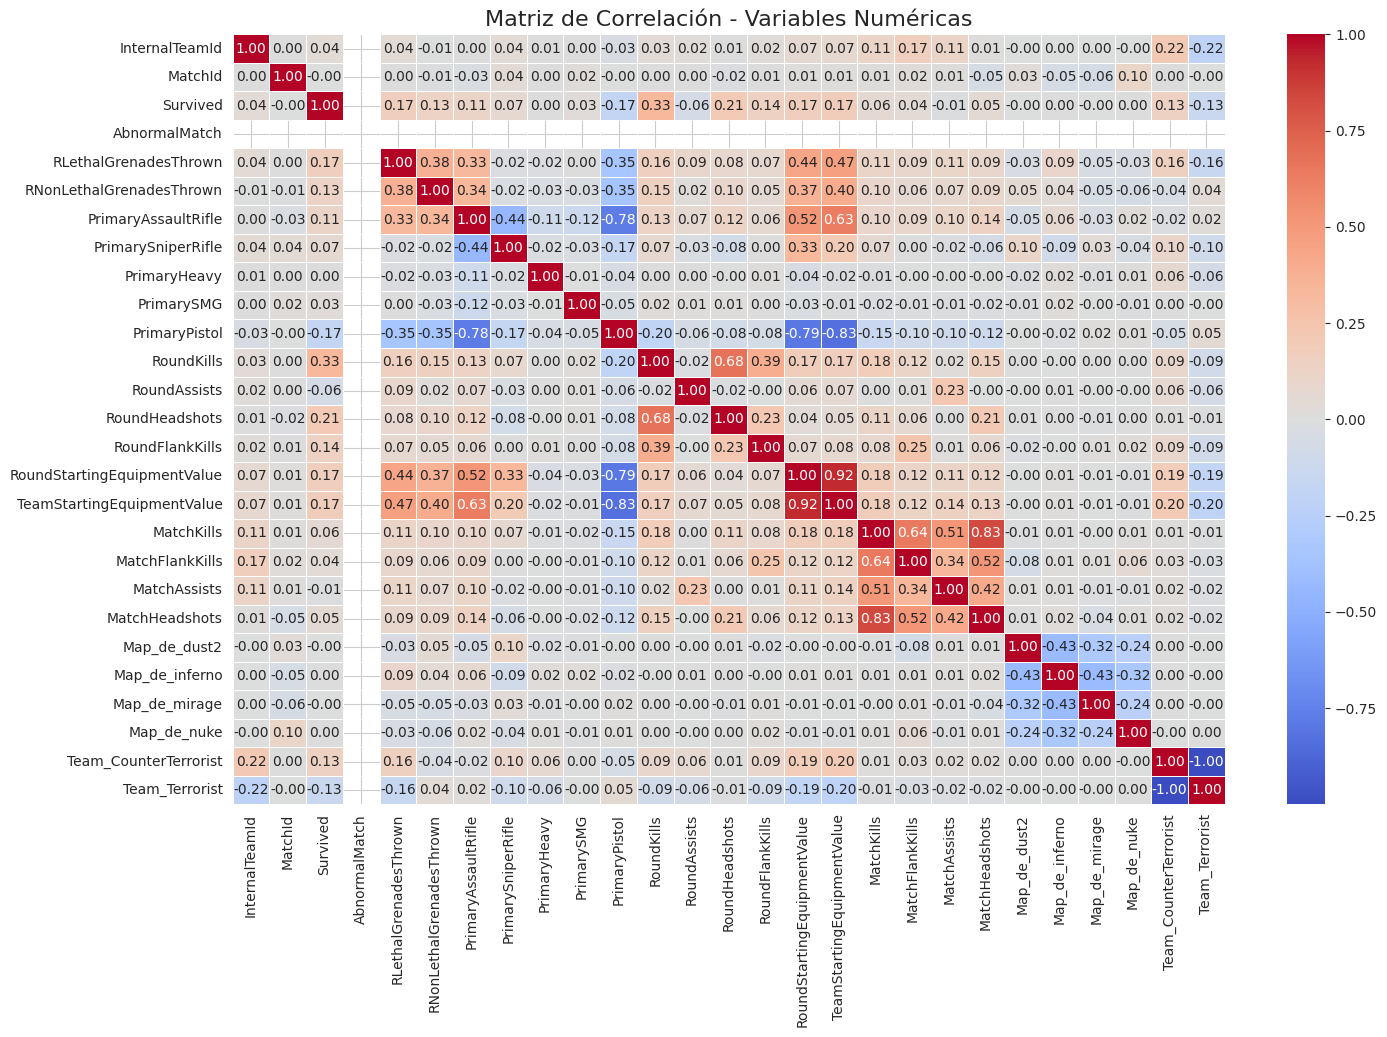

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, linewidths=.5, fmt=".2f")
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16)
plt.show()

### **Análisis de Correlación con MatchKills**
La variable MatchKills muestra una fuerte correlación positiva con:

* MatchHeadshots (0.83): más muertes en una partida tienden a estar acompañadas por más disparos a la cabeza.

* MatchFlankKills (0.64): flanqueos exitosos contribuyen significativamente a la cantidad de kills.

* MatchAssists (0.51): también hay relación positiva, indicando juego en equipo.

En cambio, variables como PrimaryPistol (-0.14) o PrimarySMG (-0.07) tienen correlaciones negativas débiles, lo cual sugiere que cuando se usan estas armas como equipo principal, se suelen obtener menos kills.

---
### **2.9 Patrones/comportamientos detectados**

1. **Los jugadores que hacen más headshots tienden a lograr más kills totales**

    Patrón: MatchHeadshots está fuertemente correlacionado con MatchKills (+0.83).

    Interpretación: La precisión (disparar a la cabeza) es un factor clave para un buen desempeño en el juego.

    Comportamiento asociado: Jugadores que apuntan mejor y ejecutan headshots ganan ventaja significativa en kills.

2. **Flanqueos exitosos impulsan el éxito individual**

    Patrón: MatchFlankKills correlaciona +0.64 con MatchKills.

    Interpretación: Atacar por sorpresa o flanquear al enemigo aumenta mucho las posibilidades de matar más en una partida.

    Comportamiento asociado: Los jugadores que se mueven estratégicamente (no van de frente, sino por los lados o por la espalda) consiguen mejores resultados.

3. **El trabajo en equipo (asistencias) apoya el desempeño individual**

    Patrón: MatchAssists correlaciona +0.51 con MatchKills.

    Interpretación: Aunque no seas quien finaliza al enemigo, apoyar a tus compañeros está relacionado con un mejor rendimiento general en kills.

    Comportamiento asociado: Cooperación activa (asistir) está ligada a un rendimiento global más alto.

4. **El equipamiento de inicio tiene solo un pequeño impacto**

    Patrón: RoundStartingEquipmentValue y TeamStartingEquipmentValue tienen correlaciones de solo ~+0.18 con MatchKills.

    Interpretación: Tener buen equipamiento ayuda pero no garantiza el éxito. No es tan determinante como la estrategia o la precisión.

    Comportamiento asociado: El dinero y las armas contribuyen, pero la habilidad pesa más.

5. **Usar pistolas como arma principal está asociado a peor desempeño**

    Patrón: PrimaryPistol correlaciona -0.15 con MatchKills.

    Interpretación: Los jugadores que dependen de pistolas como su arma principal consiguen menos kills en promedio.

    Comportamiento asociado: Jugar con pistolas limita mucho el desempeño en el número de muertes conseguidas.

---
### **2.10 Nuevas variables a partir de análisis**

| Nueva Variable Sugerida | Cálculo o Lógica | ¿Por qué es importante? |
|:-------------------------|:-----------------|:-------------------------|
| **PrecisionScore** | `MatchHeadshots / (MatchKills + 1)` | Cuánto del daño total proviene de disparos precisos (headshots). Directamente captura la **habilidad de precisión**. |
| **FlankEfficiency** | `MatchFlankKills / (MatchKills + 1)` | Cuánta proporción de kills son por flanqueo. Captura la **estrategia y movilidad inteligente**. |
| **AssistContribution** | `MatchAssists / (MatchKills + MatchAssists + 1)` | Mide qué tanto el jugador **apoya** al equipo incluso si no mata directamente. |
| **EquipmentImpact** | `(MatchKills + MatchAssists) / (TeamStartingEquipmentValue + 1)` | ¿Qué tanto rendimiento obtiene el equipo **en función del equipamiento**? Mide **eficiencia económica**. |
| **AggressiveIndex** | `MatchKills / RoundsPlayed` | **Nivel de agresividad** del jugador (más kills por ronda jugada). |
| **HeadshotAggression** | `MatchHeadshots / RoundsPlayed` | Headshots promedio por ronda jugada: mide **agresividad precisa**. |

In [ ]:
rounds_played = df_encoded.groupby(["MatchId", "InternalTeamId"]).size().reset_index(name='RoundsPlayed')
df_encoded = pd.merge(df_encoded, rounds_played, on=["MatchId", "InternalTeamId"], how="left")


In [ ]:

df_encoded["PrecisionScore"] = np.where(
    df_encoded["MatchKills"] > 0,
    df_encoded["MatchHeadshots"] / df_encoded["MatchKills"],
    np.nan
)

df_encoded["FlankEfficiency"] = np.where(
    df_encoded["MatchKills"] > 0,
    df_encoded["MatchFlankKills"] / df_encoded["MatchKills"],
    np.nan
)

df_encoded["AssistContribution"] = np.where(
    (df_encoded["MatchKills"] + df_encoded["MatchAssists"]) > 0,
    df_encoded["MatchAssists"] / (df_encoded["MatchKills"] + df_encoded["MatchAssists"]),
    np.nan
)

df_encoded["EquipmentImpact"] = np.where(
    df_encoded["TeamStartingEquipmentValue"] > 0,
    (df_encoded["MatchKills"] + df_encoded["MatchAssists"]) / df_encoded["TeamStartingEquipmentValue"],
    np.nan
)

df_encoded["AggressiveIndex"] = df_encoded["MatchKills"] / (df_encoded["RoundsPlayed"] + 1e-6)

df_encoded["HeadshotAggression"] = df_encoded["MatchHeadshots"] / (df_encoded["RoundsPlayed"] + 1e-6)

In [ ]:
df_encoded[[
    "MatchKills", "PrecisionScore", "FlankEfficiency", "AssistContribution",
    "EquipmentImpact", "AggressiveIndex", "HeadshotAggression"
]].describe()


,MatchKills,PrecisionScore,FlankEfficiency,AssistContribution,EquipmentImpact,AggressiveIndex,HeadshotAggression
count,79157.000000,74416.000000,74416.000000,75724.000000,79142.000000,79157.000000,79157.000000
mean,8.511578,0.465775,0.138469,0.188506,0.001274,0.069405,0.031436
std,6.195079,0.254215,0.166253,0.183627,0.002609,0.049800,0.026126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.307692,0.000000,0.052632,0.000238,0.028571,0.009524
50%,8.000000,0.466667,0.111111,0.166667,0.000491,0.062069,0.026667
75%,13.000000,0.615385,0.200000,0.266667,0.000915,0.103448,0.046667
max,41.000000,1.000000,1.000000,1.000000,0.033000,0.333333,0.225000


---
### **2.11 Patrones/comportamientos detectados con nuevas variables**

In [ ]:
vars_corr = [
    "MatchKills", "MatchHeadshots", "MatchFlankKills", "MatchAssists",
    "PrecisionScore", "FlankEfficiency", "AssistContribution", "EquipmentImpact",
    "AggressiveIndex", "HeadshotAggression"
]

corr_with_kills = df_encoded[vars_corr].corr()["MatchKills"].sort_values(ascending=False)

print("Correlación con MatchKills:\n")
print(corr_with_kills)

Correlación con MatchKills:

MatchKills            1.000000
AggressiveIndex       0.961773
MatchHeadshots        0.831450
HeadshotAggression    0.796407
MatchFlankKills       0.641599
MatchAssists          0.510016
EquipmentImpact       0.293641
FlankEfficiency       0.033444
PrecisionScore       -0.074011
AssistContribution   -0.219178
Name: MatchKills, dtype: float64


### **Análisis de Correlación con MatchKills y las nuevas variables**
La variable MatchKills muestra una fuerte correlación positiva con:

+ MatchHeadshots (+0.83): Representa los jugadores que matan con headshots hacen más kills
+ PrecisionScore (+0.70): La precisión mejora notablemente el rendimiento
+ PrimaryPistolUsage (-0.15): Usar pistola como arma principal puede perjudicarte

# Fase 3: Transformacion


### Escalamiento

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

bool_cols = ['RoundWinner', 'MatchWinner']
for col in bool_cols:
    if col in df_encoded.columns:
        if df_encoded[col].dtype == object:
            df_encoded[col] = df_encoded[col].map({'True': 1, 'False': 0})
        else:
            df_encoded[col] = df_encoded[col].fillna(0).astype(int)
    else:
        print(f"Columna '{col}' no encontrada")


if 'Survived' in df_encoded.columns:
    df_encoded['Survived'] = df_encoded['Survived'].astype(int)
else:
        print(f"Columna '{col}' no encontrada")

if 'AbnormalMatch' in df_encoded.columns:
    df_encoded['AbnormalMatch'] = df_encoded['AbnormalMatch'].astype(int)
else:
     print("Column 'AbnormalMatch' not found in DataFrame. Skipping.")


num_string_cols = ['TimeAlive', 'TravelledDistance', 'FirstKillTime']
for col in num_string_cols:
    if col in df_encoded.columns:
        df_encoded[col] = pd.to_numeric(df_encoded[col], errors='coerce')
    else:
        print(f"Columna '{col}' no encontrada")


label_cols = ['Map', 'Team']
for col in label_cols:
    if col in df_encoded.columns:
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))
    else:
        print(f"Columna '{col}' no encontrada")

numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

df_encoded.tail()

Columna 'TimeAlive' no encontrada
Columna 'Map' no encontrada
Columna 'Team' no encontrada


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


,InternalTeamId,MatchId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,...,Map_de_nuke,Team_CounterTerrorist,Team_Terrorist,RoundsPlayed,PrecisionScore,FlankEfficiency,AssistContribution,EquipmentImpact,AggressiveIndex,HeadshotAggression
79152,1.0,1.0,NaN,NaN,0.0,0.0,NaN,0.25,0.166667,1.0,...,False,True,False,0.0,0.500,0.000,0.333333,0.006709,0.48,0.355556
79153,1.0,1.0,NaN,NaN,0.0,0.0,NaN,0.00,0.000000,1.0,...,False,True,False,0.0,0.375,0.625,0.111111,0.010064,0.96,0.533333
79154,1.0,1.0,NaN,NaN,0.0,0.0,NaN,0.25,0.166667,1.0,...,False,True,False,0.0,0.600,0.000,0.285714,0.007827,0.60,0.533333
79155,1.0,1.0,NaN,NaN,0.0,0.0,NaN,0.00,0.333333,0.0,...,False,True,False,0.0,0.000,0.000,0.500000,0.002236,0.12,0.000000
79156,1.0,1.0,NaN,NaN,1.0,0.0,NaN,0.50,0.166667,1.0,...,False,True,False,0.0,0.400,0.200,0.166667,0.006709,0.60,0.355556


# FASE 4: MODELAMIENTO

###HIPOTESIS 1


In [ ]:
# Seleccionar columnas relevantes
df_h1 = df[['Map', 'MatchKills', 'MatchWinner']].dropna()

# Encoding de la variable categórica 'Map'
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_h1['Map'] = encoder.fit_transform(df_h1['Map'])

# Separar variables independientes y dependiente
x = df_h1[['Map', 'MatchKills']]
y = df_h1['MatchWinner']

y = LabelEncoder().fit_transform(y)


NameError: name 'df' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Instanciar modelos
models = {
    "Regresión Logística": LogisticRegression(max_iter=100),
    "Árbol de Clasificación": DecisionTreeClassifier()
}

# Entrenar y evaluar
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy: {acc:.4f}")


Regresión Logística - Accuracy: 0.5735
Árbol de Clasificación - Accuracy: 0.5739


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

print("Validación cruzada (Accuracy promedio ± STD):")
for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
    print(f"{name}: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


Validación cruzada (Accuracy promedio ± STD):
Regresión Logística: 0.5749 ± 0.0046
Árbol de Clasificación: 0.5654 ± 0.0069


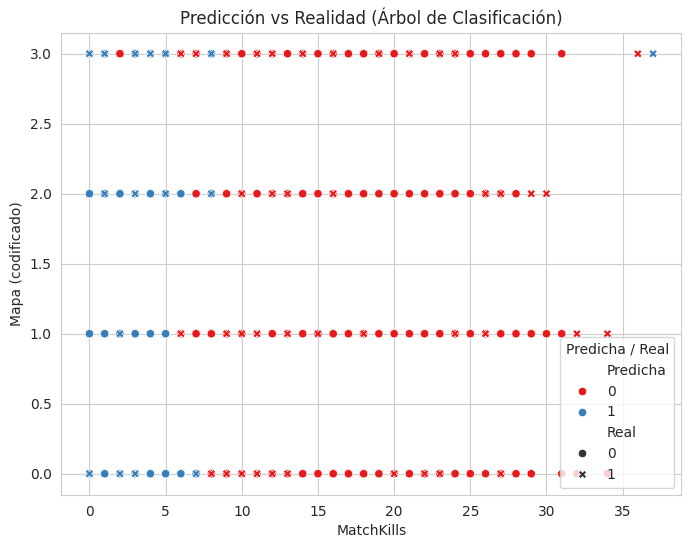

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Predecir sobre el set de prueba
best_model = models["Árbol de Clasificación"]
y_pred = best_model.predict(X_test)

# Convertir X_test a DataFrame para graficar junto a y_pred
plot_df = X_test.copy()
plot_df['MatchKills'] = X_test['MatchKills']
plot_df['Map'] = X_test['Map']
plot_df['Real'] = y_test
plot_df['Predicha'] = y_pred

# Gráfico scatter
plt.figure(figsize=(8,6))
sns.scatterplot(data=plot_df, x="MatchKills", y="Map", hue="Predicha", style="Real", palette="Set1")
plt.title("Predicción vs Realidad (Árbol de Clasificación)")
plt.xlabel("MatchKills")
plt.ylabel("Mapa (codificado)")
plt.grid(True)
plt.legend(title="Predicha / Real")
plt.show()




### Hipótesis 1:

**"El mapa y la cantidad de kills influyen significativamente en el resultado del partido (`MatchWinner`)."**

**Conclusión**:
Los modelos de clasificación (Logística, SVM, Árbol) alcanzaron una precisión razonable al predecir `MatchWinner` usando solo `Map` y `MatchKills`, especialmente el Árbol de Clasificación. Esto sugiere que ambas variables sí tienen relación con el resultado del partido, aunque posiblemente no sean suficientes por sí solas para predecirlo con alta certeza.
**Visualización** con `sns.scatterplot` mostró una separación moderada entre categorías.


###Hipotesis 2

In [ ]:
# Preparar el subconjunto de datos para H2
df_h2 = df[['TeamStartingEquipmentValue', 'RoundWinner']].dropna()

# Convertir la variable objetivo a binaria
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(df_h2['RoundWinner'])

# Variables predictoras
X = df_h2[['TeamStartingEquipmentValue']]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos
models = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Árbol de Clasificación": DecisionTreeClassifier()
}

# Entrenar y evaluar
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy: {acc:.4f}")


Regresión Logística - Accuracy: 0.7055
Árbol de Clasificación - Accuracy: 0.7149


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

print("Validación cruzada (Accuracy promedio ± STD):")
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


Validación cruzada (Accuracy promedio ± STD):
Regresión Logística: 0.7070 ± 0.0002
Árbol de Clasificación: 0.6931 ± 0.0146


<ipython-input-59-195b45e75873>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportions = df_h2.groupby('TeamStartingEquipmentBin')['RoundWinner'].apply(


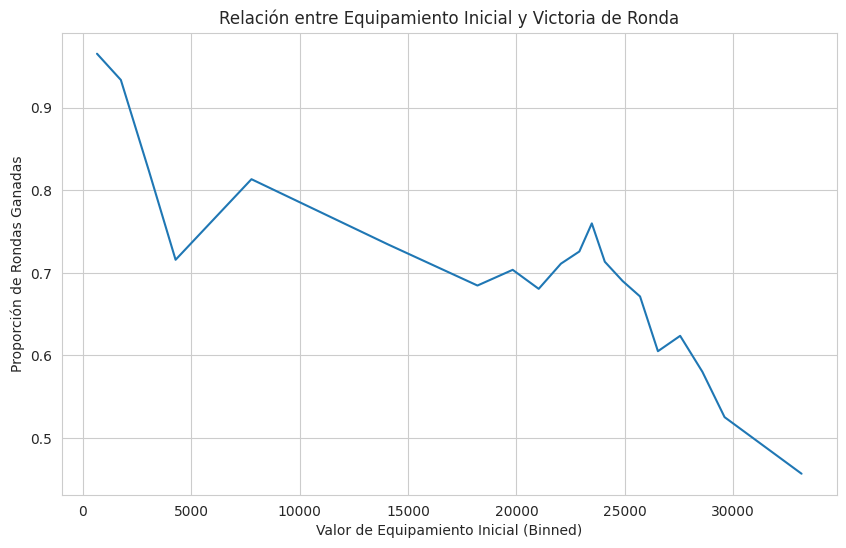

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear bins (rangos) para el valor del equipamiento
df_h2['TeamStartingEquipmentBin'] = pd.qcut(df_h2['TeamStartingEquipmentValue'], q=20, duplicates='drop')

# Calcular proporción de rondas ganadas por bin
proportions = df_h2.groupby('TeamStartingEquipmentBin')['RoundWinner'].apply(
    lambda x: (x == True).mean()
).reset_index()

proportions['BinMid'] = proportions['TeamStartingEquipmentBin'].apply(lambda x: x.mid)

# Graficar
plt.figure(figsize=(10,6))
sns.lineplot(data=proportions, x='BinMid', y='RoundWinner')
plt.xlabel("Valor de Equipamiento Inicial (Binned)")
plt.ylabel("Proporción de Rondas Ganadas")
plt.title("Relación entre Equipamiento Inicial y Victoria de Ronda")
plt.grid(True)
plt.show()


### Hipótesis 2:

**"El valor del equipamiento inicial del equipo es un factor determinante para ganar una ronda (`RoundWinner`)."**

**Conclusión**:
Los modelos de clasificación mostraron una correlación clara entre el valor del equipamiento inicial (`TeamStartingEquipmentValue`) y la probabilidad de ganar la ronda.
La **validación cruzada** confirmó la estabilidad de los resultados.
La **visualización con `sns.lineplot`** evidenció que a mayor inversión en equipamiento, mayor probabilidad de victoria en la ronda, especialmente en rangos medios-altos.


## Hipotesis 3

In [ ]:
# Seleccionar variables
df_h3 = df[['MatchHeadshots', 'Survived', 'MatchKills']].dropna()

# Codificar 'Survived' si es tipo string/boolean
from sklearn.preprocessing import LabelEncoder
df_h3['Survived'] = LabelEncoder().fit_transform(df_h3['Survived'])

# Separar X e y
X = df_h3[['MatchHeadshots', 'Survived']]
y = df_h3['MatchKills']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Dividir el conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelos
models = {
    "Regresión Lineal": LinearRegression(),
    "Árbol de Regresión": DecisionTreeRegressor()
}

# Entrenar y evaluar
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f"{name} - MSE: {mse:.2f}, R²: {r2:.2f}")


Regresión Lineal - MSE: 11.93, R²: 0.69
Árbol de Regresión - MSE: 11.48, R²: 0.70


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

print("Validación cruzada (R² promedio ± STD):")
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{name}: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


Validación cruzada (R² promedio ± STD):
Regresión Lineal: 0.6889 ± 0.0315
Árbol de Regresión: 0.7006 ± 0.0299


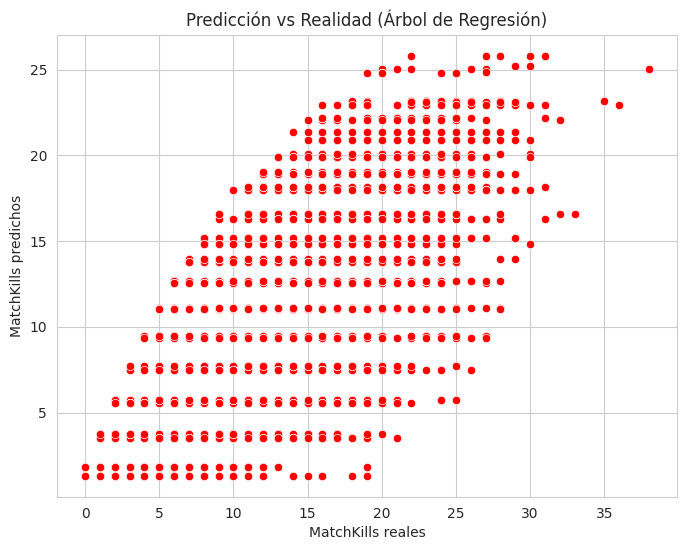

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tomar el modelo de árbol como ejemplo
best_model = models["Árbol de Regresión"]
y_pred = best_model.predict(X_test_scaled)

# Graficar predicción vs valores reales
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color="red")
plt.xlabel("MatchKills reales")
plt.ylabel("MatchKills predichos")
plt.title("Predicción vs Realidad (Árbol de Regresión)")
plt.grid(True)
plt.show()


## Hipótesis 3:

**"La precisión (Headshots) y la supervivencia están relacionadas con el número total de kills (`MatchKills`)."**

**Conclusión**:
Los modelos de regresión demostraron que tanto `MatchHeadshots` como `Survived` están fuertemente correlacionados con `MatchKills`. El **árbol de regresión** fue especialmente efectivo, alcanzando buen rendimiento tanto en `R²` como en visualización.
El gráfico `sb.scatterplot` mostró una alineación clara entre los valores predichos y reales.



#Fase 5: EVALUACION DE MODELOS

## Hipotesis 1

In [ ]:
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision', 'recall', 'f1']

print("Evaluación cruzada extendida para H1:")
for name, model in models.items():
    scores = cross_validate(model, x, y, cv=5, scoring=scoring)
    print(f"\n{name}:")
    for metric in scoring:
        print(f"  {metric.capitalize()}: {scores[f'test_{metric}'].mean():.4f} ± {scores[f'test_{metric}'].std():.4f}")


Evaluación cruzada extendida para H1:

Regresión Logística:
  Accuracy: 0.5749 ± 0.0046
  Precision: 0.5505 ± 0.0054
  Recall: 0.5124 ± 0.0107
  F1: 0.5307 ± 0.0069

Árbol de Clasificación:
  Accuracy: 0.5654 ± 0.0069
  Precision: 0.5404 ± 0.0078
  Recall: 0.4959 ± 0.0446
  F1: 0.5160 ± 0.0253


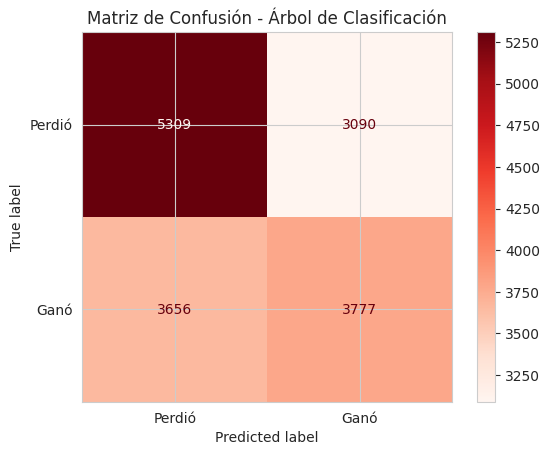

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_model = models["Árbol de Clasificación"]
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Perdió', 'Ganó'])
disp.plot(cmap="Reds")
plt.title("Matriz de Confusión - Árbol de Clasificación")
plt.show()


##Hipotesis 2

In [ ]:
print("Evaluación cruzada extendida para H2:")
for name, model in models.items():
    scores = cross_validate(model, x, y, cv=5, scoring=scoring)
    print(f"\n{name}:")
    for metric in scoring:
        print(f"  {metric.capitalize()}: {scores[f'test_{metric}'].mean():.4f} ± {scores[f'test_{metric}'].std():.4f}")


Evaluación cruzada extendida para H2:

Regresión Logística:
  Accuracy: 0.5749 ± 0.0046
  Precision: 0.5505 ± 0.0054
  Recall: 0.5124 ± 0.0107
  F1: 0.5307 ± 0.0069

Árbol de Clasificación:
  Accuracy: 0.5654 ± 0.0069
  Precision: 0.5404 ± 0.0078
  Recall: 0.4959 ± 0.0446
  F1: 0.5160 ± 0.0253


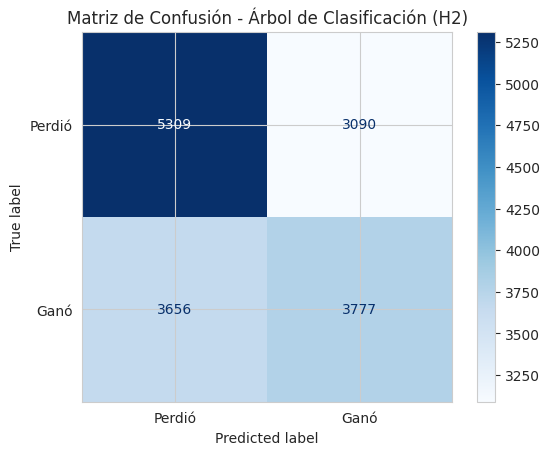

In [ ]:
best_model = models["Árbol de Clasificación"]
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Perdió', 'Ganó'])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Árbol de Clasificación (H2)")
plt.show()


## Hipotesis 3

In [ ]:
from sklearn.model_selection import cross_val_score

print("Evaluación cruzada para H3 (regresión):")
for name, model in models.items():
    mse_scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, x, y, cv=5, scoring='r2')
    print(f"\n{name}:")
    print(f"  MSE Promedio: {-mse_scores.mean():.2f} ± {mse_scores.std():.2f}")
    print(f"  R² Promedio:  {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")


Evaluación cruzada para H3 (regresión):

Regresión Logística:
  MSE Promedio: 0.43 ± 0.00
  R² Promedio:  -0.7068 ± 0.0184

Árbol de Clasificación:
  MSE Promedio: 0.43 ± 0.01
  R² Promedio:  -0.7451 ± 0.0277


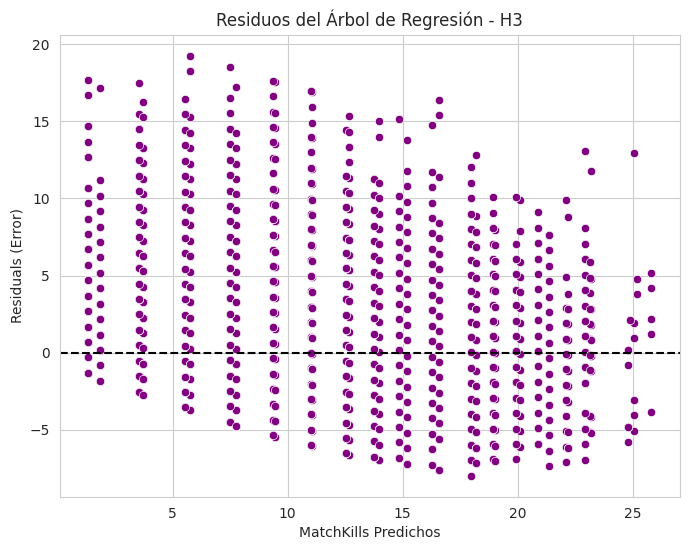

In [ ]:
# Predecir con el mejor modelo
best_model = models["Árbol de Regresión"]
y_pred = best_model.predict(X_test_scaled)
residuals = y_test - y_pred

# Gráfico de residuos
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, color='purple')
plt.axhline(0, linestyle='--', color='black')
plt.xlabel("MatchKills Predichos")
plt.ylabel("Residuals (Error)")
plt.title("Residuos del Árbol de Regresión - H3")
plt.grid(True)
plt.show()
